# Joint state analysis
<font size="3"> Comparison between reference values of HTC Valve trackers and the calculated values of Cardsflow </font>

In [203]:
# in case not installed
!pip install sklearn
!pip install matplotlib


In [204]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib
import matplotlib.pyplot as plt

In [205]:
# load dataset generated from the script write_data_from_rosbag_HTC_Cardsflow.py ...
# which took data from rosbag recording
dataset = pd.read_csv('/home/niels/Documents/Roboy/data/2021_05_17_shoulder_right_cf_data.log',delim_whitespace=True, header=0)

In [206]:
dataset = dataset.dropna()                                             # remove nan rows
dataset['roll_error'] = dataset['roll']-dataset['roll_cf']     # error_roll
dataset['pitch_error'] = dataset['pitch']-dataset['pitch_cf'] # error_pitch
dataset['yaw_error'] = dataset['yaw']-dataset['yaw_cf']         # error_yaw

# also put limits on HTC_tracker joint values
# limit shoulder_right_axis0 (roll)  lower="-1.0" upper="0.3"
# limit shoulder_right_axis1 (pitch) lower="-1.2" upper="0.0"
# limit shoulder_right_axis2 (yaw)   lower="-0.1" upper="0.1"
dataset['roll_clamped'] = dataset['roll'].clip(upper=0.3, lower=-1.0)
dataset['pitch_clamped'] = dataset['pitch'].clip(upper=0.0, lower=-1.2)
dataset['yaw_clamped'] = dataset['yaw'].clip(upper=0.1, lower=-0.1)


dataset['roll_error_cl'] = dataset['roll_clamped']-dataset['roll_cf']    # error_roll
dataset['pitch_error_cl'] = dataset['pitch_clamped']-dataset['pitch_cf'] # error_pitch
dataset['yaw_error_cl'] = dataset['yaw_clamped']-dataset['yaw_cf']       # error_yaw

dataset

,roll,pitch,yaw,roll_cf,pitch_cf,yaw_cf,roll_error,pitch_error,yaw_error,roll_clamped,pitch_clamped,yaw_clamped,roll_error_cl,pitch_error_cl,yaw_error_cl
0,0.152975,-0.665242,0.068215,0.299981,-0.513464,-0.003135,-0.147007,-0.151778,0.071349,0.152975,-0.665242,0.068215,-0.147007,-0.151778,0.071349
1,0.152638,-0.665641,0.067795,0.299981,-0.517236,-0.003336,-0.147344,-0.148405,0.071131,0.152638,-0.665641,0.067795,-0.147344,-0.148405,0.071131
2,0.152754,-0.665827,0.067738,0.299980,-0.521527,-0.003563,-0.147226,-0.144300,0.071301,0.152754,-0.665827,0.067738,-0.147226,-0.144300,0.071301
3,0.152487,-0.665701,0.067316,0.299982,-0.524483,-0.003723,-0.147495,-0.141218,0.071040,0.152487,-0.665701,0.067316,-0.147495,-0.141218,0.071040
4,0.152205,-0.666393,0.066401,0.299983,-0.527616,-0.003894,-0.147778,-0.138777,0.070295,0.152205,-0.666393,0.066401,-0.147778,-0.138777,0.070295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,-0.198740,-0.099132,-0.235999,-0.998790,-0.480940,0.072956,0.800050,0.381807,-0.308955,-0.198740,-0.099132,-0.100000,0.800050,0.381807,-0.172956
32531,-0.198761,-0.099230,-0.236029,-0.998797,-0.475844,0.071173,0.800036,0.376615,-0.307202,-0.198761,-0.099230,-0.100000,0.800036,0.376615,-0.171173
32532,-0.198806,-0.099204,-0.236032,-0.998802,-0.470401,0.069265,0.799996,0.371196,-0.305297,-0.198806,-0.099204,-0.100000,0.799996,0.371196,-0.169265
32533,-0.198588,-0.099044,-0.236017,-0.998808,-0.466248,0.067825,0.800221,0.367204,-0.303843,-0.198588,-0.099044,-0.100000,0.800221,0.367204,-0.167825


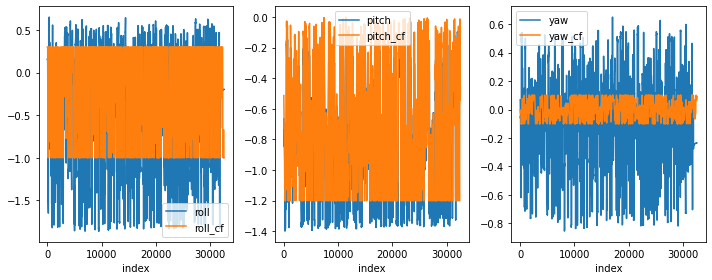

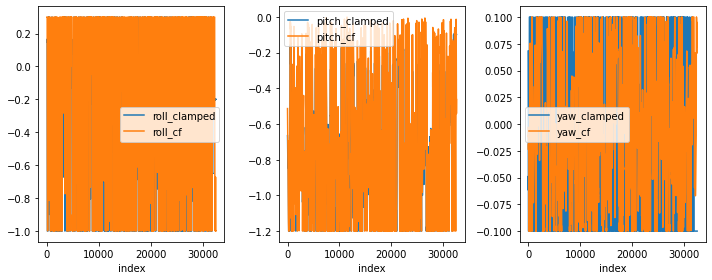

In [207]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,4))  # 1 row, 3 columns


dataset.reset_index().plot(x='index', y=["roll", "roll_cf"], ax=ax1)   # plot all data points of roll (HTC and Cardsflow)
dataset.reset_index().plot(x='index', y=["pitch", "pitch_cf"], ax=ax2) # plot all data points of pitch (HTC and Cardsflow)
dataset.reset_index().plot(x='index', y=["yaw", "yaw_cf"], ax=ax3)     # plot all data points of yaw (HTC and Cardsflow)
plt.tight_layout()  # Optional ... often improves the layout

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,4))  # 1 row, 3 columns
dataset.reset_index().plot(x='index', y=["roll_clamped", "roll_cf"], ax=ax1)   # plot all data points of roll (HTC and Cardsflow)
dataset.reset_index().plot(x='index', y=["pitch_clamped", "pitch_cf"], ax=ax2) # plot all data points of pitch (HTC and Cardsflow)
dataset.reset_index().plot(x='index', y=["yaw_clamped", "yaw_cf"], ax=ax3)     # plot all data points of yaw (HTC and Cardsflow)
plt.tight_layout()  # Optional ... often improves the layout 

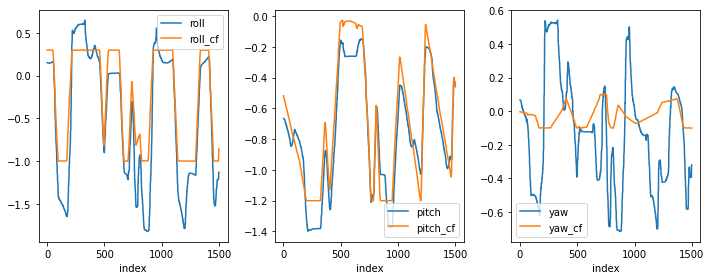

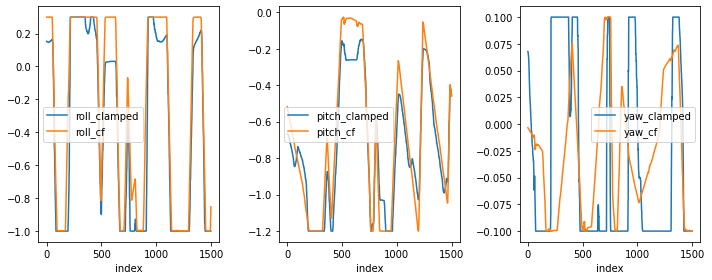

In [208]:
# plot detailed view of specified interval
specific_interval_roll = dataset[1:1500] # set interval to your needs

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,4))  # 1 row, 3 columns

specific_interval_roll.reset_index().plot(x='index', y=["roll", "roll_cf"], ax=ax1)
specific_interval_roll.reset_index().plot(x='index', y=["pitch", "pitch_cf"], ax=ax2)
specific_interval_roll.reset_index().plot(x='index', y=["yaw", "yaw_cf"],ax=ax3)       
plt.tight_layout()  # Optional ... often improves the layout 

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,4))  # 1 row, 3 columns

specific_interval_roll.reset_index().plot(x='index', y=["roll_clamped", "roll_cf"], ax=ax1)
specific_interval_roll.reset_index().plot(x='index', y=["pitch_clamped", "pitch_cf"], ax=ax2)
specific_interval_roll.reset_index().plot(x='index', y=["yaw_clamped", "yaw_cf"],ax=ax3)       
plt.tight_layout()  # Optional ... often improves the layout 

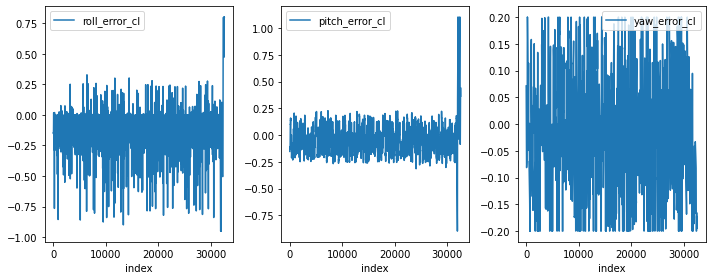

In [209]:
# plot error
"""fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,4))  # 1 row, 3 columns

dataset.reset_index().plot(x='index', y='roll_error', ax=ax1) # plot roll_error
dataset.reset_index().plot(x='index', y='pitch_error', ax=ax2) # plot pitch_error
dataset.reset_index().plot(x='index', y='yaw_error', ax=ax3) # plot yaw_error
plt.tight_layout()  # Optional ... often improves the layout """

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,4))  # 1 row, 3 columns

dataset.reset_index().plot(x='index', y='roll_error_cl', ax=ax1) # plot roll_error
dataset.reset_index().plot(x='index', y='pitch_error_cl', ax=ax2) # plot pitch_error
dataset.reset_index().plot(x='index', y='yaw_error_cl', ax=ax3) # plot yaw_error
plt.tight_layout()  # Optional ... often improves the layout 


In [210]:
#mean
mean_roll = dataset['roll_error_cl'].mean()
mean_pitch = dataset['pitch_error_cl'].mean() 
mean_yaw = dataset['yaw_error_cl'].mean() 

#standard deviation 
std_roll = dataset['roll_error_cl'].std()
std_pitch = dataset['pitch_error_cl'].std() 
std_yaw = dataset['yaw_error_cl'].std()

#Mean squarred Error Calculations
roll_ref_cl = dataset[['roll_clamped']]
pitch_ref_cl = dataset[['pitch_clamped']]
yaw_ref_cl = dataset[['yaw_clamped']]

roll_cf = dataset[['roll_cf']]
pitch_cf = dataset[['pitch_cf']]
yaw_cf = dataset[['yaw_cf']]

roll_rms = np.sqrt(mean_squared_error(roll_ref_cl, roll_cf))     # mean squarred error roll
pitch_rms = np.sqrt(mean_squared_error(pitch_ref_cl, pitch_cf))  # mean squarred error pitch
yaw_rms = np.sqrt(mean_squared_error(yaw_ref_cl, yaw_cf))        # mean squarred error yaw

print("mean_roll_error:  ", round(mean_roll,4), "std_roll_error:  ", round(std_roll,3), "roll_rms:  ", round(roll_rms,3))
print("mean_pitch_error: ", round(mean_pitch,4), "std_pitch_error: ", round(std_pitch,3), "pitch_rms: ",round(pitch_rms,3))
print("mean_yaw_error:   ", round(mean_yaw,4), "std_yaw_error:   ", round(std_yaw,3), "yaw_rms:   ",round(yaw_rms,3))

mean_roll_error:   -0.0977 std_roll_error:   0.164 roll_rms:   0.191
mean_pitch_error:  -0.0383 std_pitch_error:  0.139 pitch_rms:  0.144
mean_yaw_error:    -0.0199 std_yaw_error:    0.102 yaw_rms:    0.104


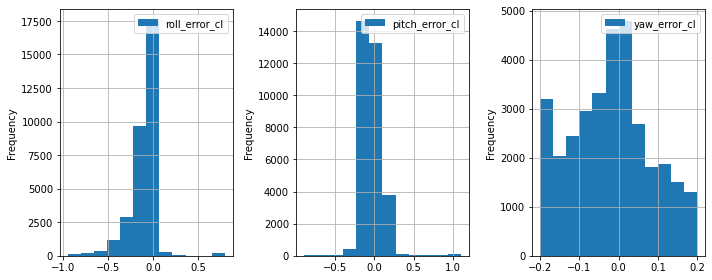

In [211]:
# determine how often which error amount occours
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,4))  # 1 row, 3 columns

dataset['roll_error_cl'].plot.hist(bins=12, grid=True, legend=True,ax =ax1)
dataset['pitch_error_cl'].plot.hist(bins=12, grid=True, legend=True,ax =ax2)
dataset['yaw_error_cl'].plot.hist(bins=12, grid=True, legend=True,ax =ax3)
plt.tight_layout()  # Optional ... often improves the layout 


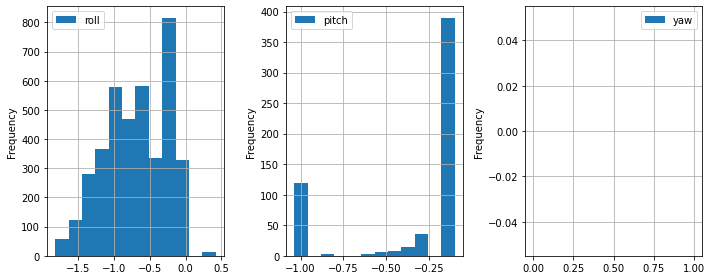

In [212]:
# determine joint angles where |roll_error_cl| > x
error_amount = 0.25

dataset['roll_error_>x'] = ((dataset.roll_error_cl>error_amount) | (dataset.roll_error_cl< -error_amount))
dataset['pitch_error_>x'] = ((dataset.pitch_error_cl>error_amount) | (dataset.pitch_error_cl< -error_amount))
dataset['yaw_error_>x'] = ((dataset.yaw_error_cl>error_amount) | (dataset.yaw_error_cl< -error_amount))
dataset1=dataset.loc[dataset['roll_error_>x'] == True]
dataset2=dataset.loc[dataset['pitch_error_>x'] == True]
dataset3=dataset.loc[dataset['yaw_error_>x'] == True]

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,4))  # 1 row, 3 columns
dataset1['roll'].plot.hist(bins=12, grid=True, legend=True,ax =ax1)
dataset2['pitch'].plot.hist(bins=12, grid=True, legend=True,ax =ax2)
dataset3['yaw'].plot.hist(bins=12, grid=True, legend=True,ax =ax3)
plt.tight_layout()  # Optional ... often improves the layout 